## CONNECTTEL CUSTOMER CHURN PREDICTION MODEL

### MODEL OBJECTIVE

The objective of the model is to develop a predictive system that accurately forecasts customer churn for ConnectTel, enabling the company to proactively identify customers at high risk of leaving. By leveraging machine learning and advanced analytics, the model aims to provide actionable insights that ConnectTel can use to implement targeted retention strategies. This will help reduce customer attrition, enhance customer loyalty, and strengthen ConnectTel’s position in the competitive telecommunications market.

In [105]:
# Import all necessary libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


In [5]:
# Load dataset
data = pd.read_csv('Customer-Churn.csv')

In [7]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
data.shape

(7043, 21)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


From the dataset, we can confirm that there are no non-null values, and for the datatypes, we have 1 feature that is float64, 2 that are int64, and 18 that are object. The dataset has 21 features in total.

In [14]:
# Checking for duplicates
data.duplicated().sum()

0

There is no duplicate in the dataset.

In [17]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [19]:
data.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


Given that the mean and median values for the numerical variables are quite near to one another, it appears that there are no outliers in the data.

As can be seen from the above breakdown, some features that should have two distinct values instead have three. To determine the source of the abnormality and how to address it, we will investigate further using univariate analysis.

### Univariate Analysis

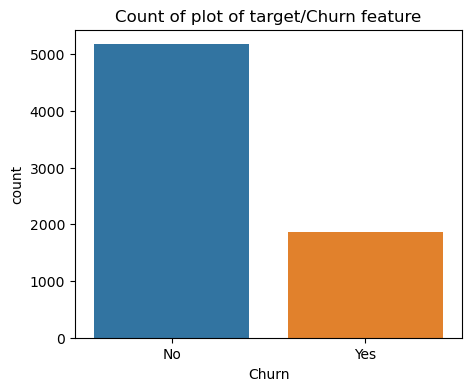

In [24]:
# Check for the distribution of the target variable that is the Churn feature
plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=data, hue='Churn')
plt.title('Count of plot of target/Churn feature')
plt.show()

In [233]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

This shows that there is an imbalance in the target variable, as the number of customers that have cancelled their service is only about 27% of the target variable.

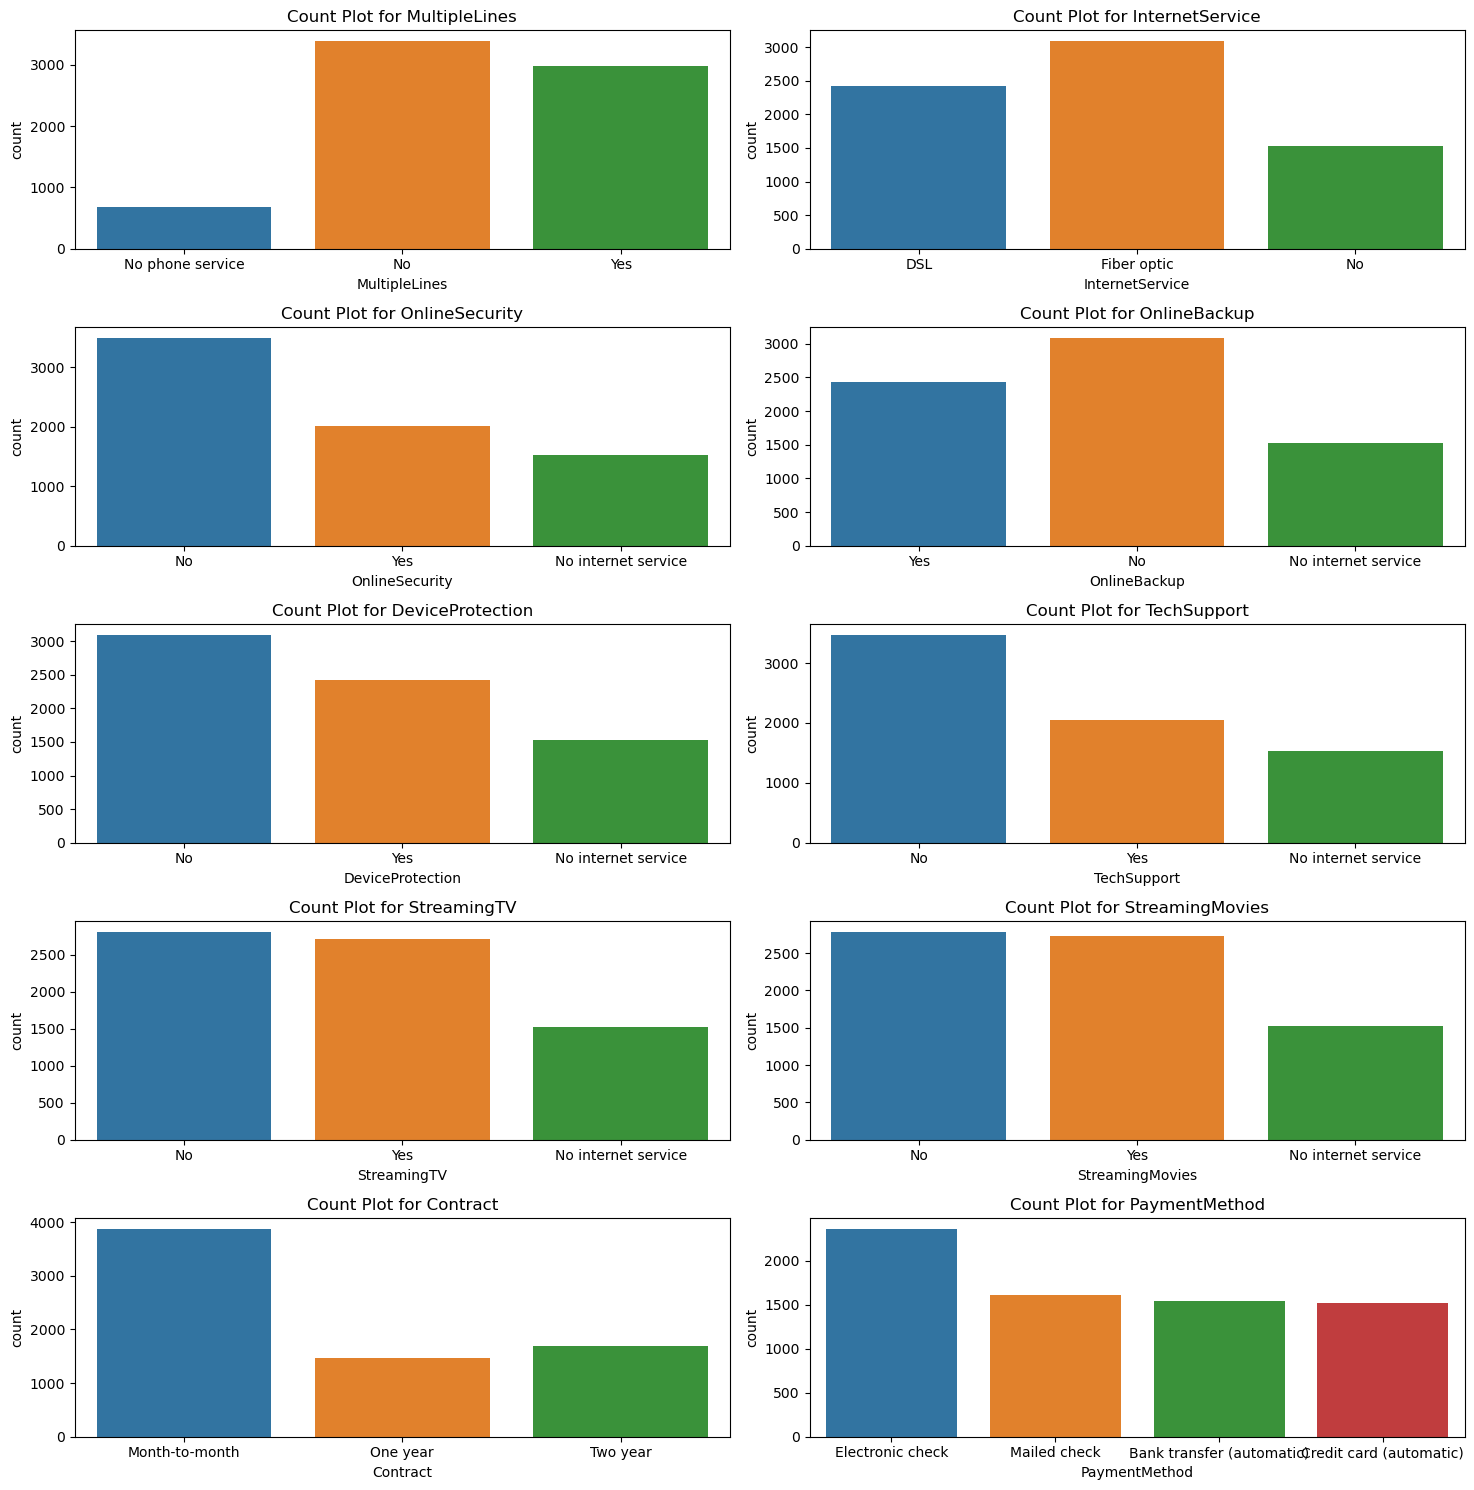

In [29]:
# Check for the distribution of some of the features
num_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
num_rows = (len(num_columns) + 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15,15))

position = axes.flatten()

for index,name_of_feature in enumerate(num_columns):
    sns.countplot(x=data[name_of_feature], data=data, hue=name_of_feature, ax=position[index])
    position[index].set_title(f'Count Plot for {name_of_feature}')

plt.tight_layout()

From the plots above, especially for columns 'OnlineSecurity', 'OnlineBackup', 'StreamingTV', and 'StreamingMovies', it shows a third value, 'No internet service,' which I believe that without internet service, you don't have any of those features. Let's perform further analysis, and we will deal with the third during the preprocessing stage.

### Bivariate Analysis

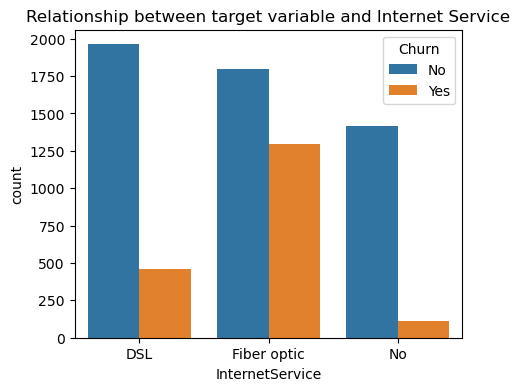

In [187]:
plt.figure(figsize=(5,4))
sns.countplot(x=data['InternetService'], data=data, hue='Churn')
plt.title('Relationship between target variable and Internet Service')
plt.savefig("churn_vs_internet_service.png")  
plt.show()

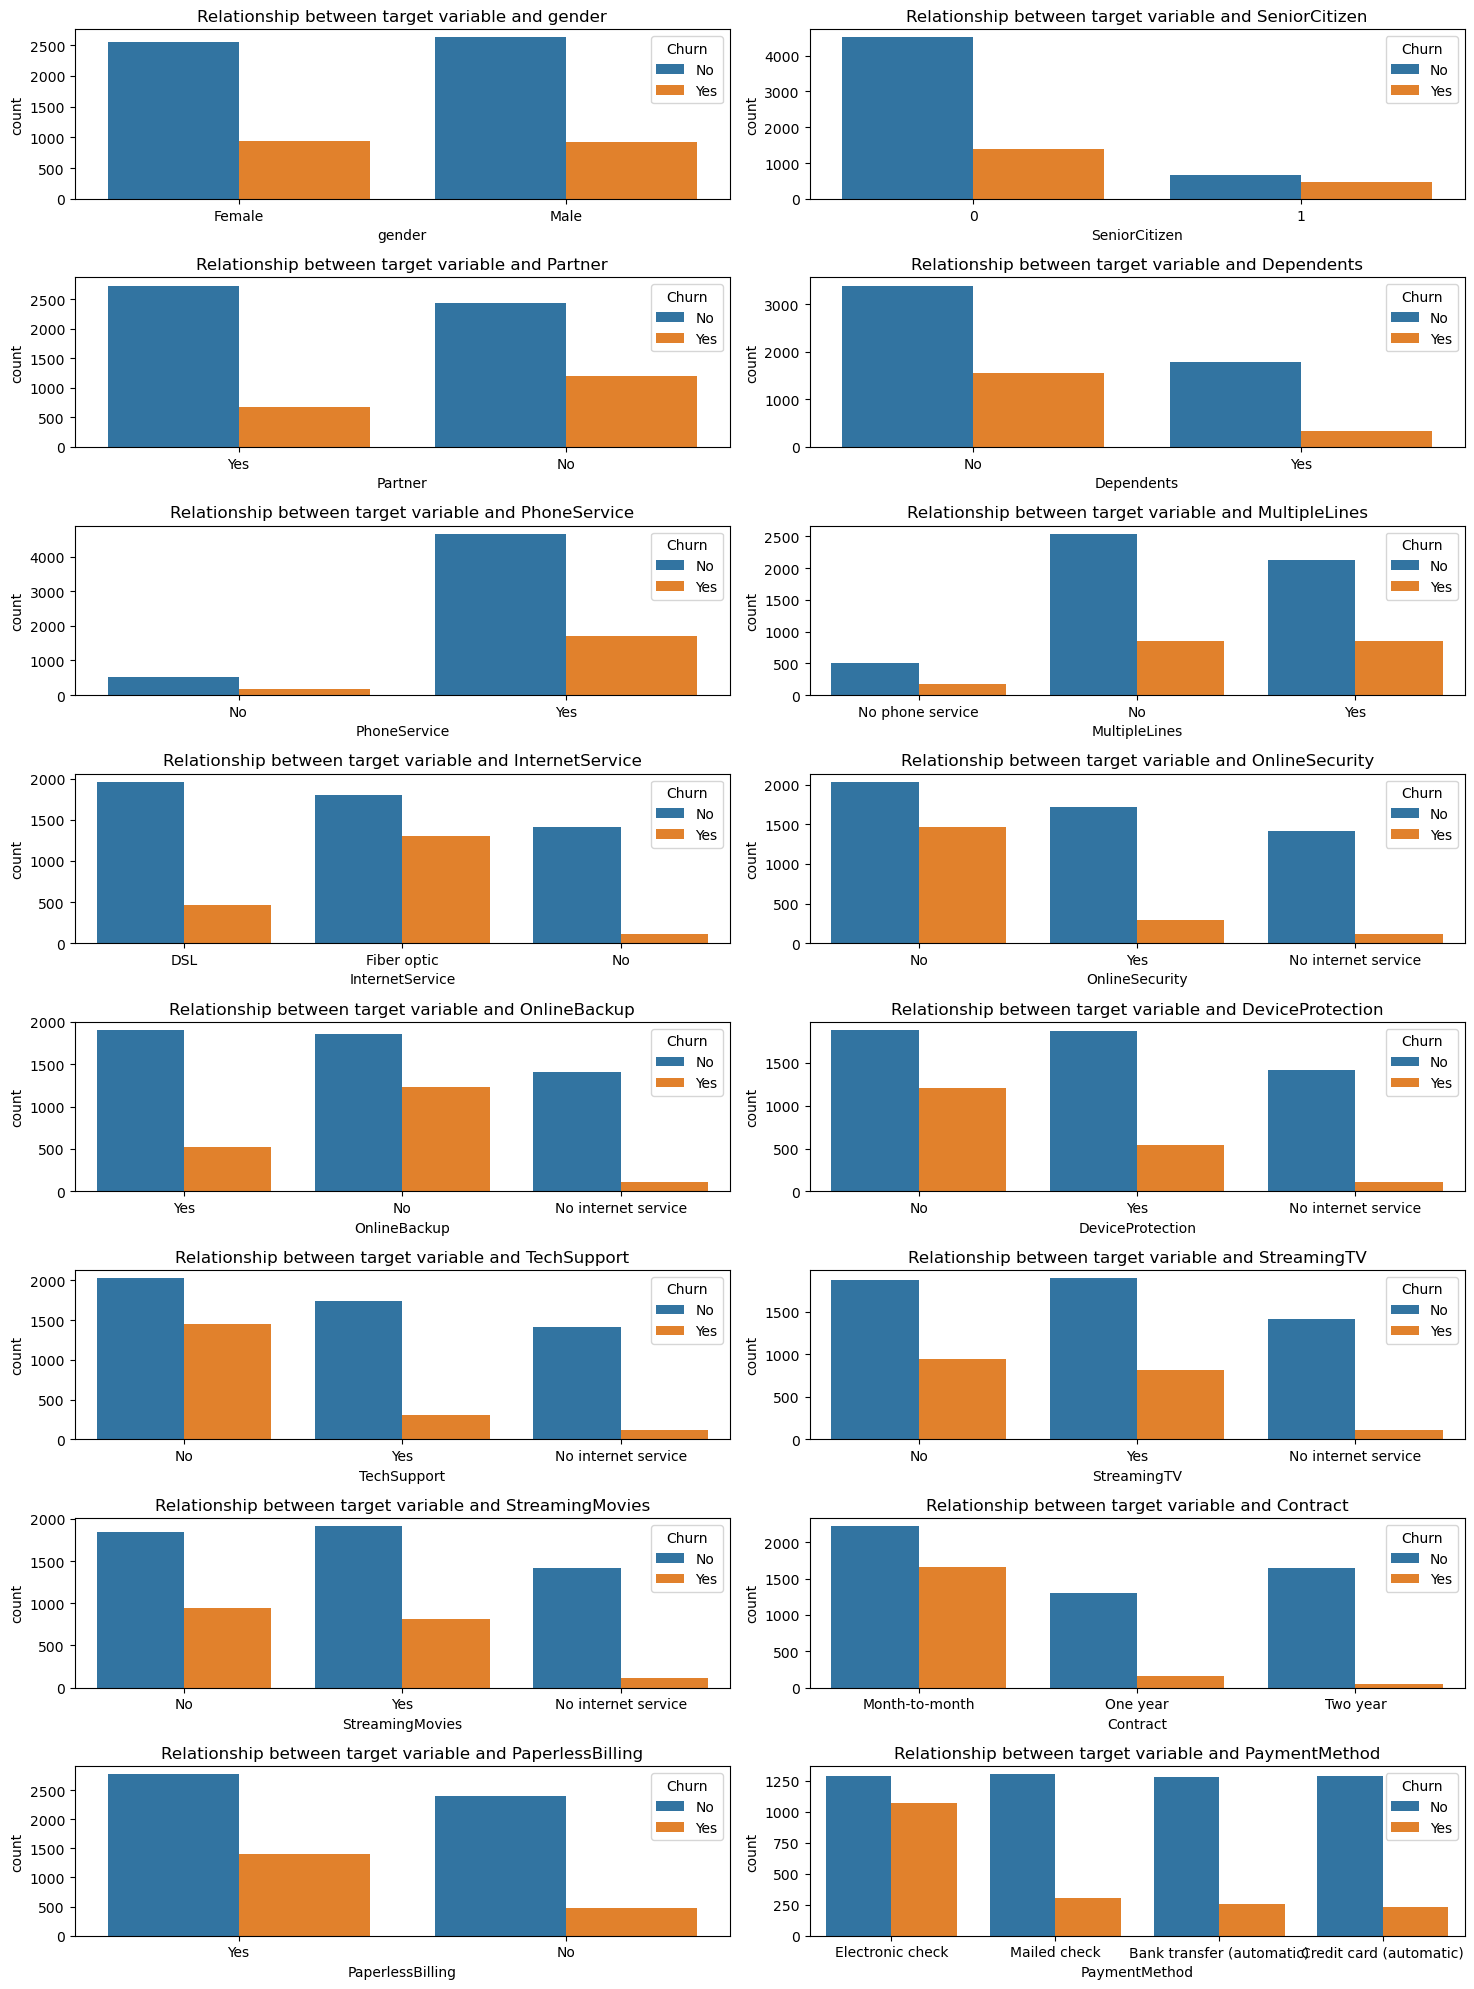

In [33]:
# Check for the distribution of some of the features against the target (Churn) variable
num_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                'PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                'PaymentMethod']
num_rows = (len(num_columns) + 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15,20))

position = axes.flatten()

for index,name_of_feature in enumerate(num_columns):
    sns.countplot(x=data[name_of_feature], data=data, hue='Churn', ax=position[index])
    position[index].set_title(f'Relationship between target variable and {name_of_feature}')

plt.tight_layout()

Although it seems like an anomaly, the entries with 'No internet service' have very low attrition, which means that the company's calls and SMS service is very good and their internet service needs improvement, especially the fiber optic, which is supposed to be the best. Actionable insight: improve their internet service

The senior citizens have over 70% churn rate. This might be because the services are too sophisticated or advanced for them. which is expected because most very likely have fewer need for the service due to failing health. campaigns should focus on those still in active service. Actionable Insight: Tailor services or communication strategies for senior citizens to reduce churn within this demographic

Customers with partners and/or dependents did not churn as much as those without any, which is expected because they very likely rely on the telecommunication service for family communication. Actionable Insight: The company should focus retention strategies on customers without family-related ties who might be at higher churn risk.

Customers with online security, online backup, and device protection have a lower churn rate. This is because these services increase the overall value they receive. Actionable insight: Promote these value-added services to reduce churn among high-risk customers.

Customers with tech support have a lower churn rate. This is because customers who receive timely and helpful support are less likely to churn, and it also points out that the company's tech support is doing a good job. Actionable Insight: Promote/extend tech support experiences to retain customers who face technical issues.

Customers with paperless billing and electronic checks have a higher churn rate, which is quite strange, as the reverse was expected because of the expected convenience and reduced friction in managing bills. Actionable Insight: conduct a poll on the challenges with the paperless billing and electronc check, then streamline the process.

Customers on month-to-month contracts have a higher churn rate than customers on extended contracts. Actionable Insight: Promote longer contracts among customers may be by providing loyalty discounts.

In [36]:
# Lets convert the Total charges column to float and create buckets for total charges, monthly charges and tenure to extract further insights

data['TotalCharges1'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [38]:
data['TotalCharges1'].isnull().sum()

11

In [40]:
def tenure_bracket(tenure):
    if tenure <= 15:
        return "New Subscriber(<=15)"
    elif tenure <= 35:
        return "Recent Subscriber(<=35)"
    elif tenure <= 55:
        return "Established SubScriber(<=55)"
    else:
        return "Loyal Subscriber(>55)"

# apply the function and create a new column - tenure_bracket

data["tenure_bracket"] = data["tenure"].apply(tenure_bracket)

In [42]:
def MonthlyCharges_bracket(MonthlyCharges):
    if MonthlyCharges <= 35:
        return "Basic Plan(<=35)"
    elif MonthlyCharges <= 65:
        return "Standard Plan(<=65)"
    elif MonthlyCharges <= 90:
        return "Premium Plan(<=90)"
    else:
        return "Executive Plan(>90)"

# apply the function and create a new column - MonthlyCharges_bracket

data["MonthlyCharges_bracket"] = data["MonthlyCharges"].apply(MonthlyCharges_bracket)

In [44]:
# For Total charges lets drop the 11 entries that have null Values
# Make a copy of the dataset
data1 = data.copy()

data1 = data1.dropna()

In [46]:
def TotalCharges1_bracket(TotalCharges1):
    if TotalCharges1 <= 2000:
        return "Low Spending(<=2000)"
    elif TotalCharges1 <= 4000:
        return "Moderate Spending(<=4000)"
    elif TotalCharges1 <= 6500:
        return "High Spending(<=6500)"
    else:
        return "Premium Spending(>6500)"

# apply the function and create a new column - TotalCharges1_bracket

data1["TotalCharges1_bracket"] = data1["TotalCharges1"].apply(TotalCharges1_bracket)

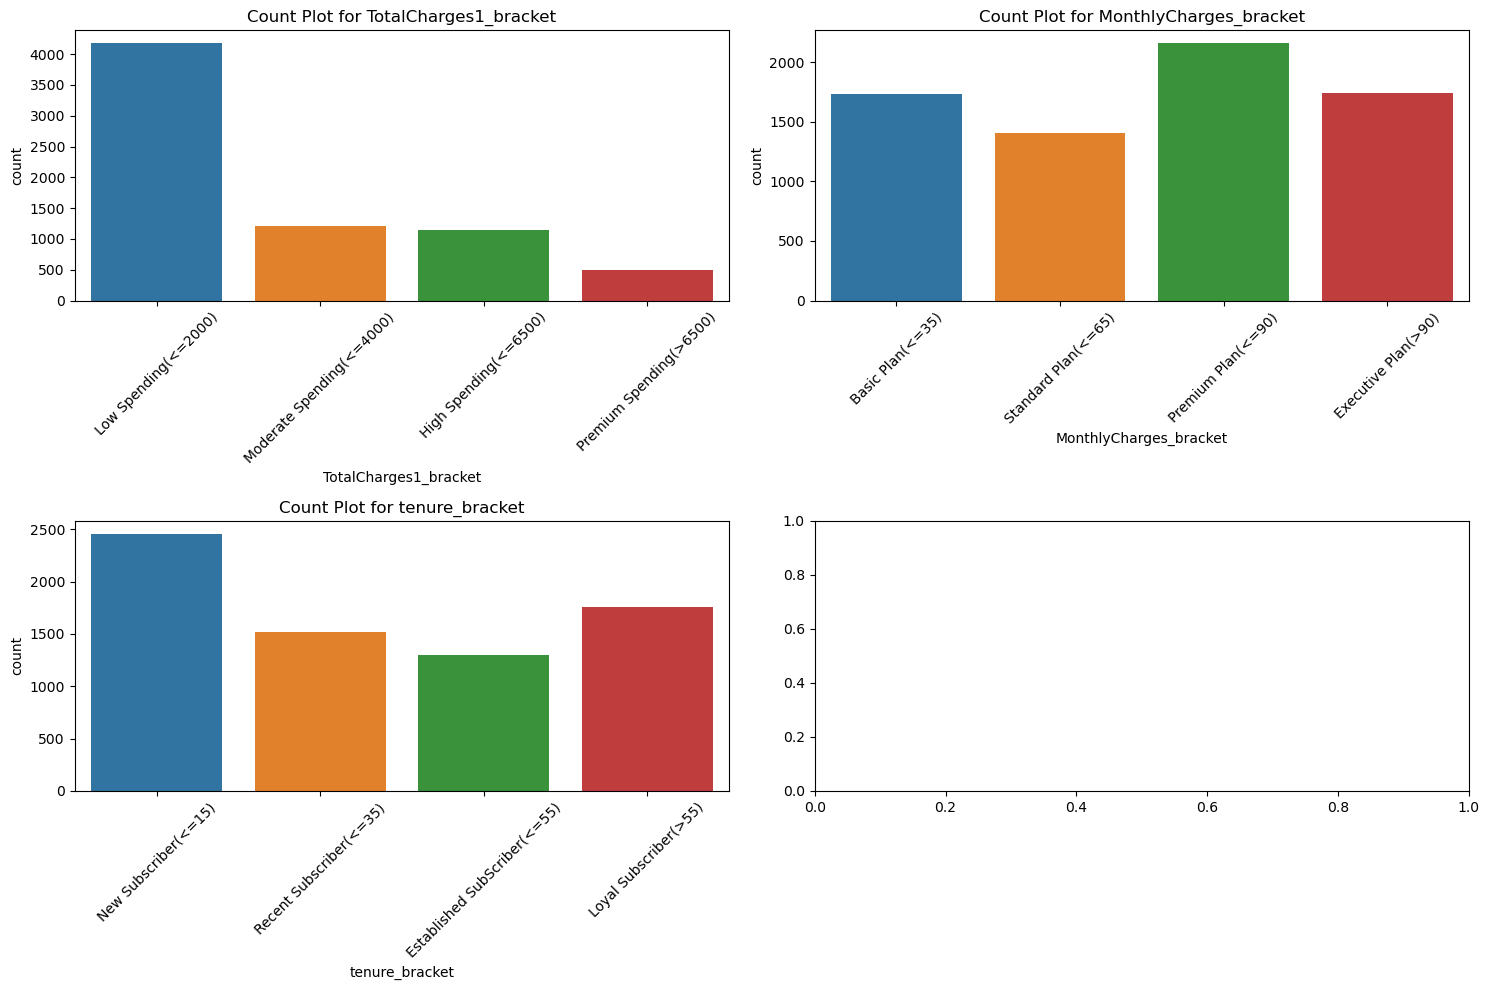

In [48]:
# Check for the distribution of the bucket features
num_columns = ['TotalCharges1_bracket', 'MonthlyCharges_bracket', 'tenure_bracket']
num_rows = (len(num_columns) + 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15,10))

position = axes.flatten()

for index,name_of_feature in enumerate(num_columns):
    sns.countplot(x=data1[name_of_feature], data=data1, hue=name_of_feature, ax=position[index])
    #position[index].set_xticklabels(data1,rotation=45)
    position[index].tick_params('x', labelrotation=45)
    position[index].set_title(f'Count Plot for {name_of_feature}')
    
plt.tight_layout()

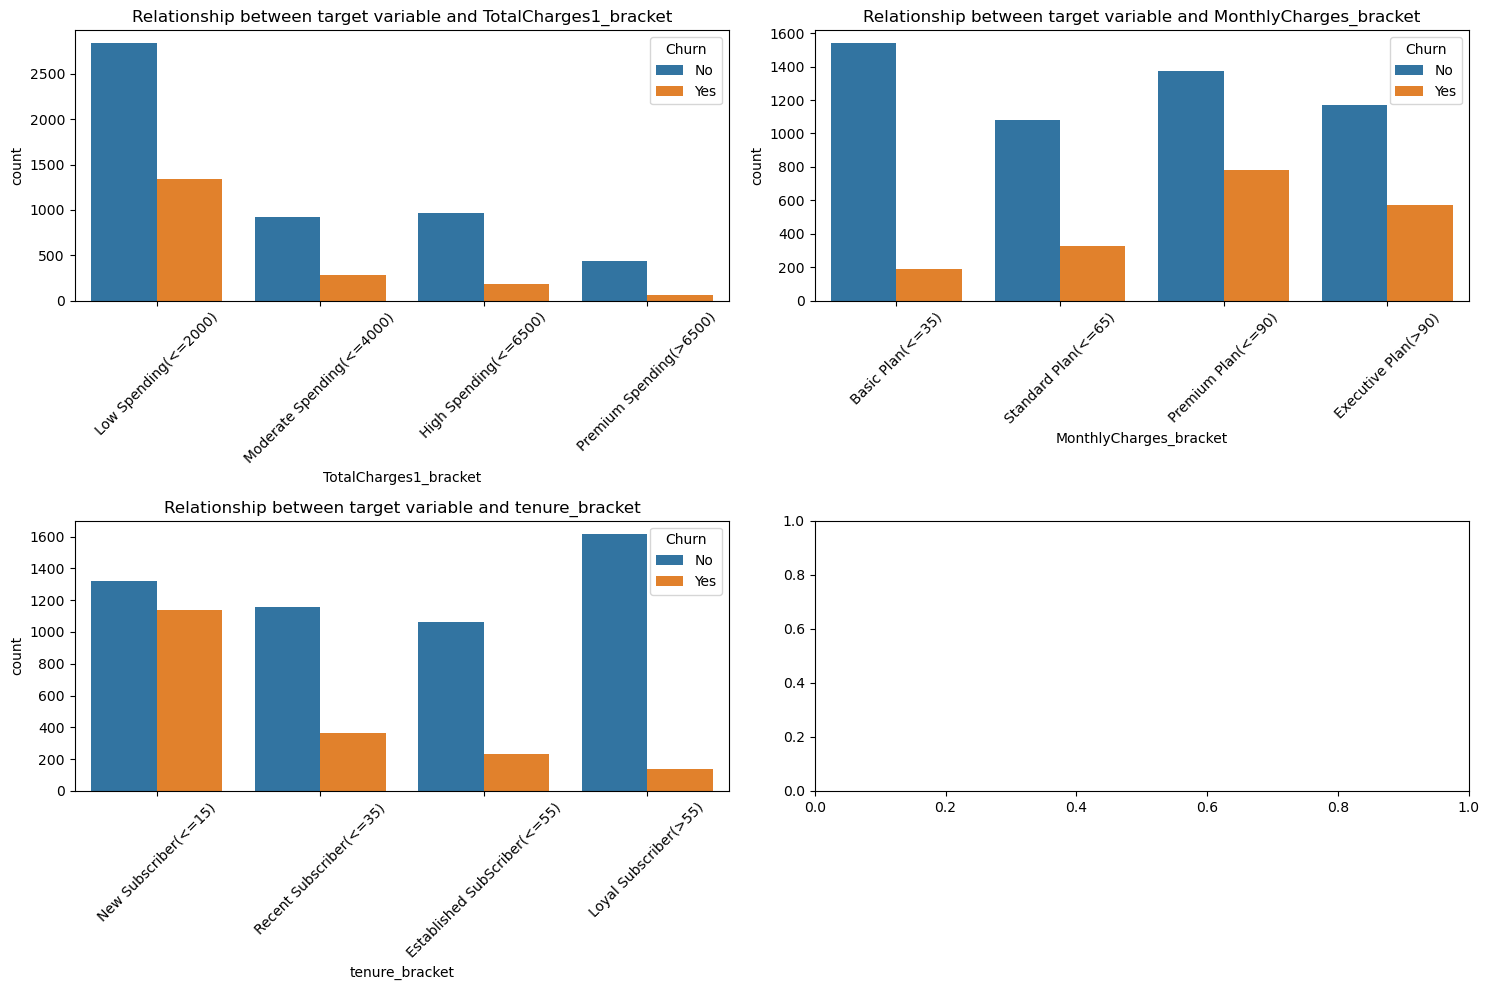

In [50]:
# Check for the distribution of the bucket features against the Churn feature
num_columns = ['TotalCharges1_bracket', 'MonthlyCharges_bracket', 'tenure_bracket']
num_rows = (len(num_columns) + 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15,10))

position = axes.flatten()

for index,name_of_feature in enumerate(num_columns):
    sns.countplot(x=data1[name_of_feature], data=data1, hue='Churn', ax=position[index])
    position[index].tick_params('x', labelrotation=45)
    position[index].set_title(f'Relationship between target variable and {name_of_feature}')

plt.tight_layout()

It is observed that customers with higher monthly charges have a high churn rate, likely because of dissatisfaction from the high charges. Actionable Insight: Consider a more competitive pricing or flexible package for customers with high monthly bills.

New subscribers have a higher churn rate than customers that have been with the company for a long time. Actionable Insight: Consider loyalty programs or retention strategies for new subscribers to retain them.

Customers with low total charges tend to leave the company services, this is very likely as a result of new subscribers having a high churn rate before they get to accumulate more charges. Addressing the high churn rate among new subscribers will likely reduce the number of customers with low total charges who leave.

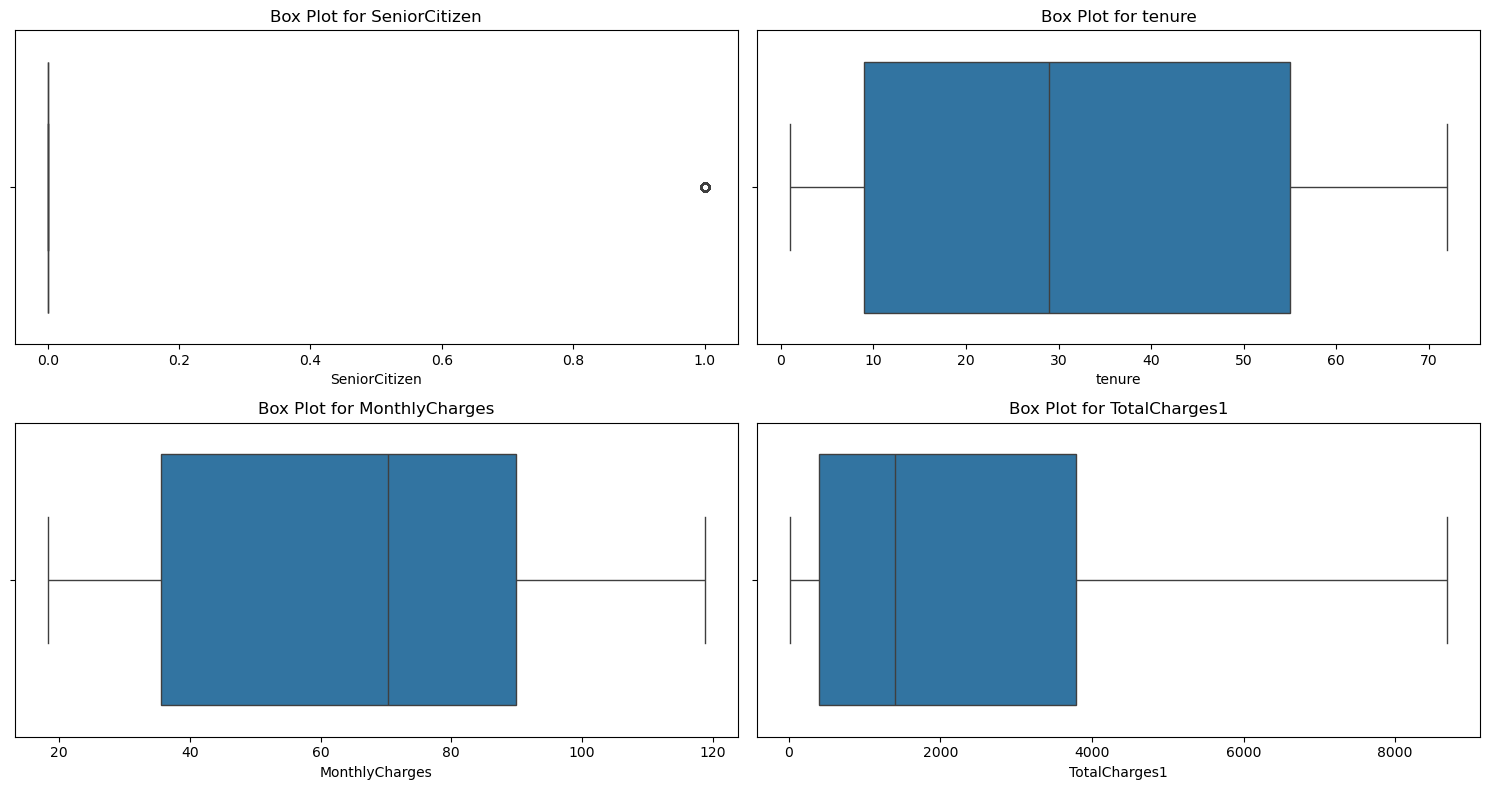

In [53]:
# Check for outliers using boxplot
numerical_df = data1.select_dtypes(exclude='object')

num_columns = numerical_df.columns
num_rows = (len(num_columns) + 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15,8))

position = axes.flatten()

for index,name_of_feature in enumerate(num_columns):
    sns.boxplot(x=numerical_df[name_of_feature], ax=position[index])
    position[index].set_title(f'Box Plot for {name_of_feature}')

plt.tight_layout()

The boxplot indicates no outliers in our data.

### Data Preprocessing

In [57]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customerID              7032 non-null   object 
 1   gender                  7032 non-null   object 
 2   SeniorCitizen           7032 non-null   int64  
 3   Partner                 7032 non-null   object 
 4   Dependents              7032 non-null   object 
 5   tenure                  7032 non-null   int64  
 6   PhoneService            7032 non-null   object 
 7   MultipleLines           7032 non-null   object 
 8   InternetService         7032 non-null   object 
 9   OnlineSecurity          7032 non-null   object 
 10  OnlineBackup            7032 non-null   object 
 11  DeviceProtection        7032 non-null   object 
 12  TechSupport             7032 non-null   object 
 13  StreamingTV             7032 non-null   object 
 14  StreamingMovies         7032 non-null   objec

In [60]:
# We'll remove columns unnecessary for the model: the analysis buckets, TotalCharges, and customerID.

data1 = data1.drop(['customerID','TotalCharges', 'tenure_bracket', 'MonthlyCharges_bracket','TotalCharges1_bracket'], axis=1)

In [62]:
# let's change the TotalCharges1 to TotalCharges
data1.rename(columns={'TotalCharges1':'TotalCharges'}, inplace=True)

In [64]:
data1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'Churn', 'TotalCharges'],
      dtype='object')

In [66]:
# Checking if the 'No internet service' has the same value across the features
cols = ['InternetService', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'TechSupport', 'OnlineSecurity']

for col in cols:
    print(data1[col].value_counts())
    print('\n')

InternetService
Fiber optic    3096
DSL            2416
No             1520
Name: count, dtype: int64


OnlineBackup
No                     3087
Yes                    2425
No internet service    1520
Name: count, dtype: int64


DeviceProtection
No                     3094
Yes                    2418
No internet service    1520
Name: count, dtype: int64


StreamingTV
No                     2809
Yes                    2703
No internet service    1520
Name: count, dtype: int64


StreamingMovies
No                     2781
Yes                    2731
No internet service    1520
Name: count, dtype: int64


TechSupport
No                     3472
Yes                    2040
No internet service    1520
Name: count, dtype: int64


OnlineSecurity
No                     3497
Yes                    2015
No internet service    1520
Name: count, dtype: int64




We'll employ one-hot encoding using get_dummies to convert nominal categorical features into numerical ones. To avoid redundancy, we'll retain only one instance of the 'No internet service' feature, as it's consistently present across all relevant columns.

In [70]:
cat_cols = data1.select_dtypes(exclude=['int64','float64']).columns

In [72]:
cat_cols

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [74]:
# we convert the categorical variables to numerical while removing the Churn feature (target variable) from cat_cols

data_num = pd.get_dummies(data1, 
                                   columns=[
                                       'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                                       'PaperlessBilling', 'PaymentMethod'
                                   ], dtype=int)

In [76]:
data_num

,SeniorCitizen,tenure,MonthlyCharges,Churn,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,No,29.85,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,No,1889.50,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,Yes,108.15,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,No,1840.75,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,Yes,151.65,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,No,1990.50,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,No,7362.90,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,No,346.45,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,Yes,306.60,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


In [78]:
# Let's drop all the instances of 'No internet service' leaving only one  'InternetService_No'

data_num = data_num.drop(['OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'OnlineSecurity_No internet service', 
                          'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service'], axis=1)

In [80]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   Churn                                    7032 non-null   object 
 4   TotalCharges                             7032 non-null   float64
 5   gender_Female                            7032 non-null   int32  
 6   gender_Male                              7032 non-null   int32  
 7   Partner_No                               7032 non-null   int32  
 8   Partner_Yes                              7032 non-null   int32  
 9   Dependents_No                            7032 non-null   int32  
 10  Dependents_Yes                           7032 non-nul

In [82]:
# convert the target variable to 0 and 1

data_num['Churn'] = data_num['Churn'].replace(['No', 'Yes'], [0, 1])

C:\Users\Ify\AppData\Local\Temp\ipykernel_13592\1321873496.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_num['Churn'] = data_num['Churn'].replace(['No', 'Yes'], [0, 1])


In [ ]:
# Encoding categorical variables
#encoder = LabelEncoder()

#data_num['Churn'] = encoder.fit_transform(data_num['Churn'])

In [86]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 40 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   tenure                                   7032 non-null   int64  
 2   MonthlyCharges                           7032 non-null   float64
 3   Churn                                    7032 non-null   int64  
 4   TotalCharges                             7032 non-null   float64
 5   gender_Female                            7032 non-null   int32  
 6   gender_Male                              7032 non-null   int32  
 7   Partner_No                               7032 non-null   int32  
 8   Partner_Yes                              7032 non-null   int32  
 9   Dependents_No                            7032 non-null   int32  
 10  Dependents_Yes                           7032 non-nul

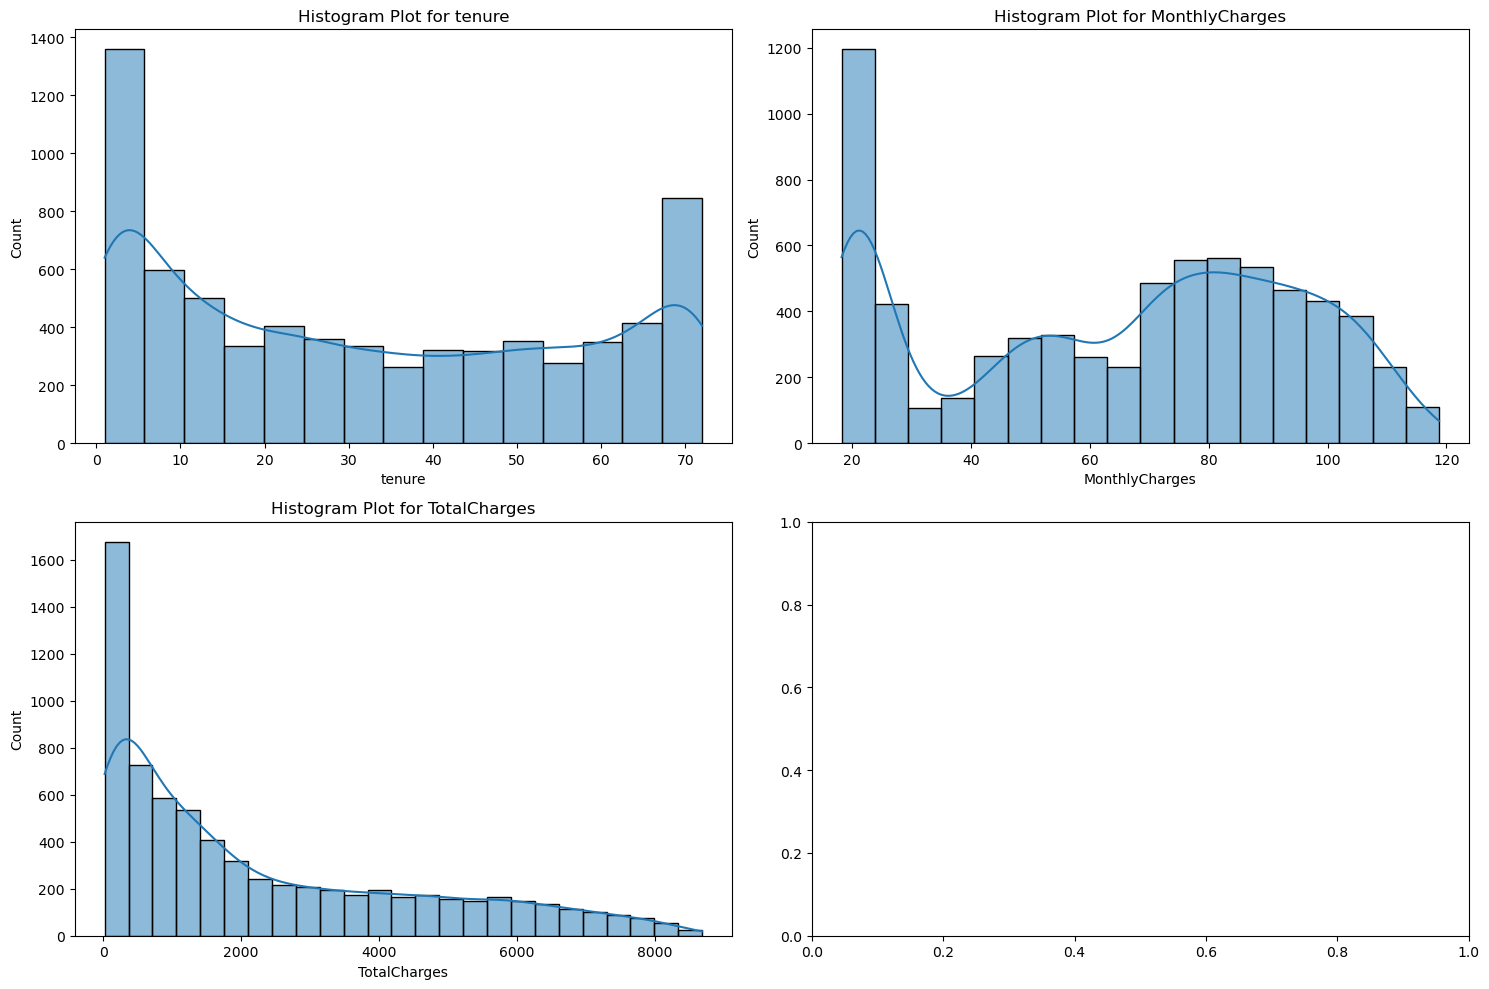

In [88]:
# Check for the distribution of our data on the three features that then values is not between 0 and 1
columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
num_rows = (len(columns) + 1) // 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15,10))

position = axes.flatten()

for index,name_of_feature in enumerate(columns):
    sns.histplot(x=data_num[name_of_feature], ax=position[index], kde=True)
    position[index].set_title(f'Histogram Plot for {name_of_feature}')

plt.tight_layout()

In [90]:
# using the MinMax scaler let's normalize the distribution since the data is more of uniform than normal distribution
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
for i in cols:
    data_num[i] = scaler.fit_transform(data_num[[i]])

In [92]:
data_num.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.000000,0.115423,0,0.001275,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,0.464789,0.385075,0,0.215867,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,0.014085,0.354229,1,0.010310,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0.619718,0.239303,0,0.210241,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,0.014085,0.521891,1,0.015330,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [94]:
# Separate the dataset into features and labels
label = data_num['Churn']
features = data_num.drop(['Churn'], axis=1)

In [96]:
features

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.000000,0.115423,0.001275,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,0.464789,0.385075,0.215867,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,0.014085,0.354229,0.010310,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,0.619718,0.239303,0.210241,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,0.014085,0.521891,0.015330,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.323944,0.662189,0.227521,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,1.000000,0.845274,0.847461,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,0,0.140845,0.112935,0.037809,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,1,0.042254,0.558706,0.033210,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [98]:
label

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

### Model training and Evaluation

In [101]:
# split our data into training and test data
Xtrain, Xtest, ytrain, ytest = train_test_split(features, label, test_size=0.3, random_state=42)

In [103]:
classifiers = [
    [LogisticRegression(random_state=42, class_weight={0:1, 1:2}), 'Logistic Regression'],
    [SGDClassifier(random_state=42, class_weight={0:1, 1:2}), 'SGD Classifier'],
    [RandomForestClassifier(random_state=42, class_weight={0:1, 1:2}), 'Random Forest'],
    [DecisionTreeClassifier(random_state=42, class_weight={0:1, 1:2}), 'Decision Tree'],
    [XGBClassifier(random_state=42, class_weight={0:1, 1:2}), 'XGBoost'],
    [SVC(random_state=42, class_weight={0:1, 1:2}), 'SVC']
]

<------ Logistic Regression --------->
              precision    recall  f1-score   support

           0    0.89341   0.77921   0.83241      1549
           1    0.54941   0.74332   0.63182       561

    accuracy                        0.76967      2110
   macro avg    0.72141   0.76126   0.73212      2110
weighted avg    0.80195   0.76967   0.77908      2110



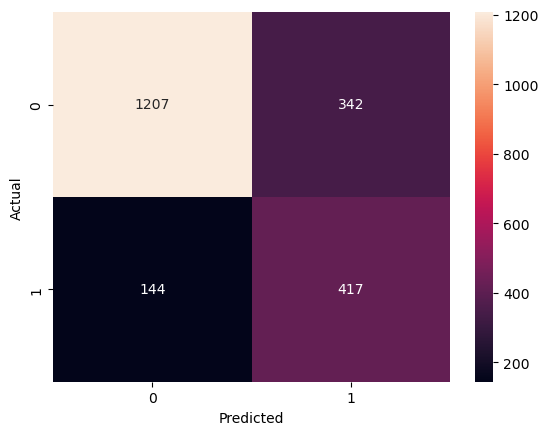

<------ SGD Classifier --------->
              precision    recall  f1-score   support

           0    0.89482   0.76888   0.82708      1549
           1    0.54044   0.75045   0.62836       561

    accuracy                        0.76398      2110
   macro avg    0.71763   0.75966   0.72772      2110
weighted avg    0.80059   0.76398   0.77425      2110



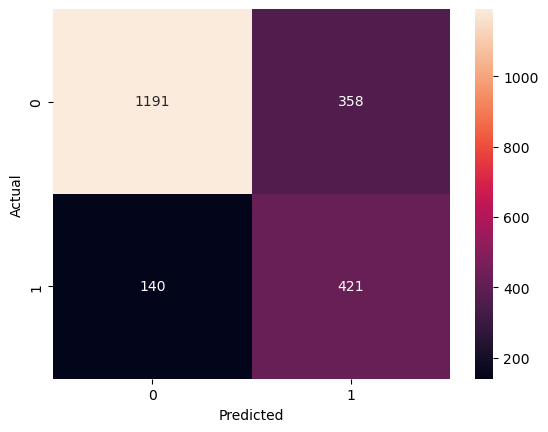

<------ Random Forest --------->
              precision    recall  f1-score   support

           0    0.82493   0.89735   0.85962      1549
           1    0.62588   0.47415   0.53955       561

    accuracy                        0.78483      2110
   macro avg    0.72540   0.68575   0.69959      2110
weighted avg    0.77200   0.78483   0.77452      2110



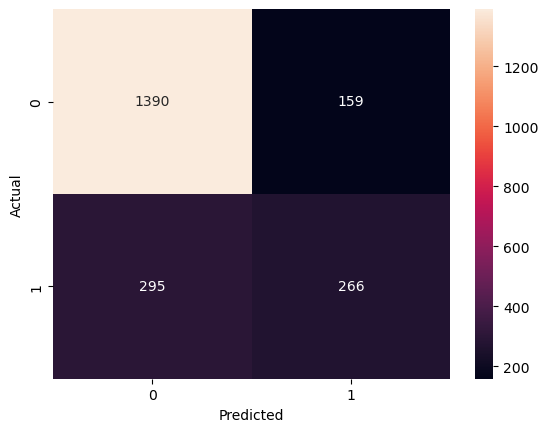

<------ Decision Tree --------->
              precision    recall  f1-score   support

           0    0.81076   0.80762   0.80918      1549
           1    0.47443   0.47950   0.47695       561

    accuracy                        0.72038      2110
   macro avg    0.64259   0.64356   0.64307      2110
weighted avg    0.72134   0.72038   0.72085      2110



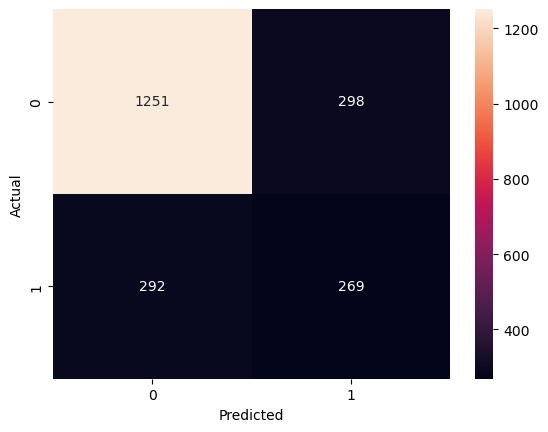

<------ XGBoost --------->


C:\Users\Ify\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:17:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0    0.83002   0.86378   0.84657      1549
           1    0.57631   0.51159   0.54202       561

    accuracy                        0.77014      2110
   macro avg    0.70317   0.68768   0.69429      2110
weighted avg    0.76257   0.77014   0.76560      2110



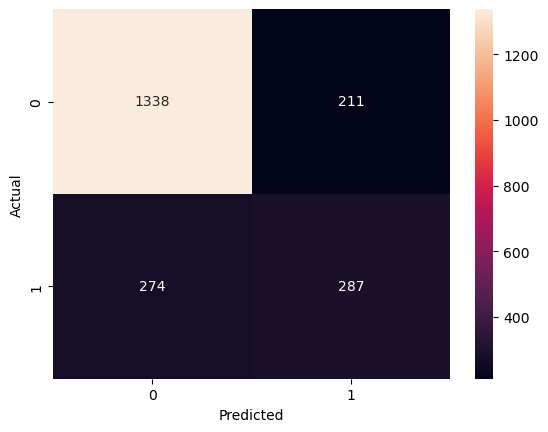

<------ SVC --------->
              precision    recall  f1-score   support

           0    0.88515   0.78115   0.82990      1549
           1    0.54374   0.72014   0.61963       561

    accuracy                        0.76493      2110
   macro avg    0.71445   0.75065   0.72477      2110
weighted avg    0.79438   0.76493   0.77400      2110



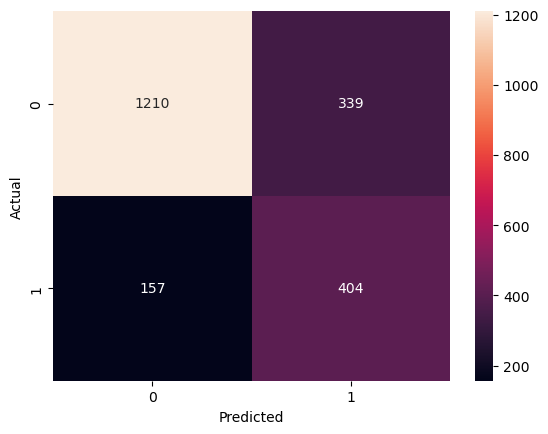

In [107]:
acc_list = {}
precision_list = {}
recall_list = {}
f1_list = {}

for classifier in classifiers:
    model = classifier[0]
    model_name = classifier[1]
    print(f'<------ {model_name} --------->')
    model.fit(Xtrain,ytrain)
    predictions = model.predict(Xtest)
    
    a_score = accuracy_score(ytest, predictions)
    p_score = precision_score(ytest, predictions)
    r_score = recall_score(ytest, predictions)
    f_score = f1_score(ytest, predictions)

    acc_list[model_name] = (str(round(a_score*100, 2)) + '%')
    precision_list[model_name] = (str(round(p_score*100, 2)) + '%')
    recall_list[model_name] = (str(round(r_score*100, 2)) + '%')
    f1_list[model_name] = (str(round(f_score*100, 2)) + '%')
    
    report = classification_report(ytest, predictions, digits=5)
    matrix=confusion_matrix(ytest, predictions)
    print(report)
    sns.heatmap(matrix, annot=True, fmt='g')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

In [109]:
result = {'Accurracy Score': acc_list, 'Precision Score': precision_list, 'Recall Score': recall_list, 'F1 Score': f1_list}

print('Summary Of Algorithms')
result_table = pd.DataFrame.from_dict(result, orient='index')
result_table

Summary Of Algorithms


,Logistic Regression,SGD Classifier,Random Forest,Decision Tree,XGBoost,SVC
Accurracy Score,76.97%,76.4%,78.48%,72.04%,77.01%,76.49%
Precision Score,54.94%,54.04%,62.59%,47.44%,57.63%,54.37%
Recall Score,74.33%,75.04%,47.42%,47.95%,51.16%,72.01%
F1 Score,63.18%,62.84%,53.96%,47.7%,54.2%,61.96%


Given our emphasis on Recall and F1-score, Logistic Regression, SGD Classifier, and SVC demonstrate superior performance compared to other models.


#### Hyper Parameter tuning

To further optimize the performance of our top three models, we'll conduct hyperparameter tuning.

##### Logistic Regression

In [118]:
# set parameters

param_grid_lr = {
    'max_iter':[50, 100, 200, 300, 400],
    'C': [0.5,0.8,1.0,1.5,2.0],
    'class_weight':[ {0:1, 1:2},{0:1, 1:3},{0:1, 1:5},{0:1, 1:6}, {0:1, 1:7}]
}

In [120]:
met_grid= ['recall', 'f1']

In [124]:
grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42), param_grid= param_grid_lr, scoring=met_grid, refit='recall', cv=5)

In [126]:
grid_search.fit(Xtrain, ytrain)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.5, 0.8, 1.0, 1.5, 2.0],
                         'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3},
                                          {0: 1, 1: 5}, {0: 1, 1: 6},
                                          {0: 1, 1: 7}],
                         'max_iter': [50, 100, 200, 300, 400]},
             refit='recall', scoring=['recall', 'f1'])

In [128]:
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_:.5f}')

Best Parameters: {'C': 0.5, 'class_weight': {0: 1, 1: 7}, 'max_iter': 50}
Best Score: 0.93275


In [130]:
acc_list_hpt = {}
precision_list_hpt = {}
recall_list_hpt = {}
f1_list_hpt = {}


              precision    recall  f1-score   support

           0    0.95006   0.51582   0.66862      1549
           1    0.40898   0.92513   0.56721       561

    accuracy                        0.62464      2110
   macro avg    0.67952   0.72048   0.61792      2110
weighted avg    0.80620   0.62464   0.64166      2110



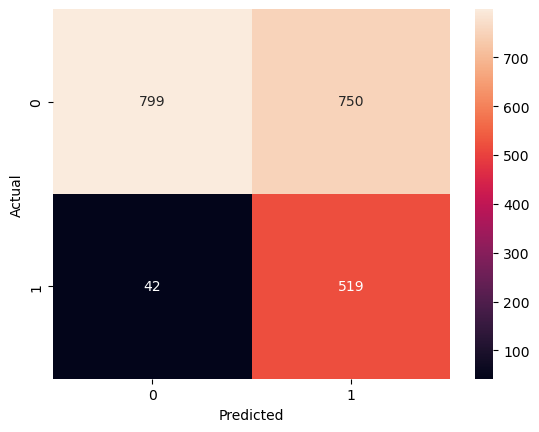

In [134]:

model = LogisticRegression(random_state=42, C=0.5, class_weight={0: 1, 1: 7}, max_iter=50)
model.fit(Xtrain,ytrain)
predictions = model.predict(Xtest)

a_score_hpt = accuracy_score(ytest, predictions)
p_score_hpt = precision_score(ytest, predictions)
r_score_hpt = recall_score(ytest, predictions)
f_score_hpt = f1_score(ytest, predictions)

acc_list_hpt['Logistic Regression'] = (str(round(a_score_hpt*100, 2)) + '%')
precision_list_hpt['Logistic Regression'] = (str(round(p_score_hpt*100, 2)) + '%')
recall_list_hpt['Logistic Regression'] = (str(round(r_score_hpt*100, 2)) + '%')
f1_list_hpt['Logistic Regression'] = (str(round(f_score_hpt*100, 2)) + '%')

report = classification_report(ytest, predictions, digits=5)
matrix=confusion_matrix(ytest, predictions)
print(report)
sns.heatmap(matrix, annot=True, fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### SGDClassifier

In [145]:
# set parameters

param_grid_sgd = {
    'max_iter':[800, 1000, 2000, 4000],
    'loss': ['hinge','log_loss','modified_huber','squared_hinge'],
    'class_weight':[{0:1, 1:3},{0:1, 1:5},{0:1, 1:6}, {0:1, 1:7}]
}

In [147]:
met_grid= ['recall', 'f1']

In [149]:
grid_search = GridSearchCV(estimator=SGDClassifier(random_state=42), param_grid= param_grid_sgd, cv=5, scoring=met_grid, refit='recall')

In [151]:
grid_search.fit(Xtrain, ytrain)

GridSearchCV(cv=5, estimator=SGDClassifier(random_state=42),
             param_grid={'class_weight': [{0: 1, 1: 3}, {0: 1, 1: 5},
                                          {0: 1, 1: 6}, {0: 1, 1: 7}],
                         'loss': ['hinge', 'log_loss', 'modified_huber',
                                  'squared_hinge'],
                         'max_iter': [800, 1000, 2000, 4000]},
             refit='recall', scoring=['recall', 'f1'])

In [153]:
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_:.5f}')

Best Parameters: {'class_weight': {0: 1, 1: 7}, 'loss': 'hinge', 'max_iter': 800}
Best Score: 0.93279


              precision    recall  f1-score   support

           0    0.96812   0.21562   0.35269      1549
           1    0.31161   0.98039   0.47291       561

    accuracy                        0.41896      2110
   macro avg    0.63987   0.59801   0.41280      2110
weighted avg    0.79357   0.41896   0.38466      2110



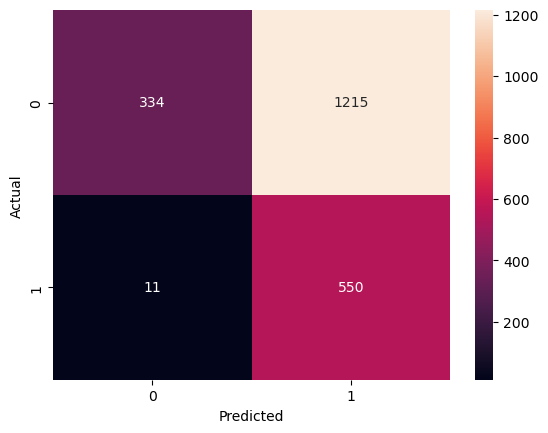

In [155]:

model = SGDClassifier(random_state=42, loss='hinge', class_weight={0: 1, 1: 7}, max_iter=800)
model.fit(Xtrain,ytrain)
predictions = model.predict(Xtest)

a_score_hpt = accuracy_score(ytest, predictions)
p_score_hpt = precision_score(ytest, predictions)
r_score_hpt = recall_score(ytest, predictions)
f_score_hpt = f1_score(ytest, predictions)

acc_list_hpt['SGD Classifier'] = (str(round(a_score_hpt*100, 2)) + '%')
precision_list_hpt['SGD Classifier'] = (str(round(p_score_hpt*100, 2)) + '%')
recall_list_hpt['SGD Classifier'] = (str(round(r_score_hpt*100, 2)) + '%')
f1_list_hpt['SGD Classifier'] = (str(round(f_score_hpt*100, 2)) + '%')

report = classification_report(ytest, predictions, digits=5)
matrix=confusion_matrix(ytest, predictions)
print(report)
sns.heatmap(matrix, annot=True, fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##### SVC

In [158]:
# set parameters

param_grid_svc = {
    'C': [1.0,0.5,1.5,2.0],
    'class_weight':[{0:1, 1:6}, {0:1, 1:3}, {0:1, 1:4},{0:1, 1:5}],
    'kernel':['linear', 'poly', 'rbf','sigmoid']
}

In [160]:
met_grid= ['recall', 'f1']

In [164]:
grid_search = GridSearchCV(estimator=SVC(random_state=42), param_grid= param_grid_svc, cv=5, scoring=met_grid, refit='recall')

In [166]:
grid_search.fit(Xtrain, ytrain)

GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid={'C': [1.0, 0.5, 1.5, 2.0],
                         'class_weight': [{0: 1, 1: 6}, {0: 1, 1: 3},
                                          {0: 1, 1: 4}, {0: 1, 1: 5}],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             refit='recall', scoring=['recall', 'f1'])

In [168]:
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_:.5f}')

Best Parameters: {'C': 0.5, 'class_weight': {0: 1, 1: 6}, 'kernel': 'rbf'}
Best Score: 0.92586


              precision    recall  f1-score   support

           0    0.94484   0.50872   0.66135      1549
           1    0.40361   0.91800   0.56070       561

    accuracy                        0.61754      2110
   macro avg    0.67422   0.71336   0.61102      2110
weighted avg    0.80094   0.61754   0.63459      2110



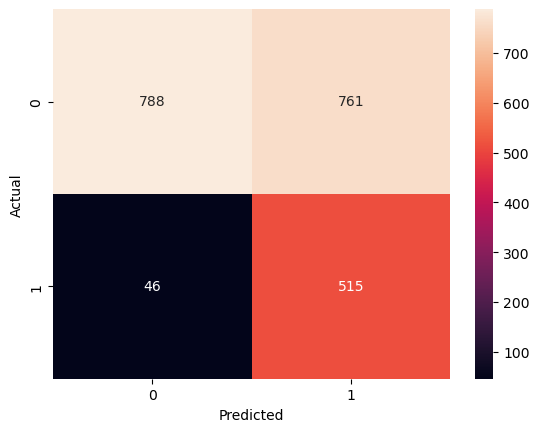

In [170]:
model = SVC(random_state=42, C=0.5, class_weight={0: 1, 1: 6}, kernel='rbf')
model.fit(Xtrain,ytrain)
predictions = model.predict(Xtest)

a_score_hpt = accuracy_score(ytest, predictions)
p_score_hpt = precision_score(ytest, predictions)
r_score_hpt = recall_score(ytest, predictions)
f_score_hpt = f1_score(ytest, predictions)

acc_list_hpt['SVC'] = (str(round(a_score_hpt*100, 2)) + '%')
precision_list_hpt['SVC'] = (str(round(p_score_hpt*100, 2)) + '%')
recall_list_hpt['SVC'] = (str(round(r_score_hpt*100, 2)) + '%')
f1_list_hpt['SVC'] = (str(round(f_score_hpt*100, 2)) + '%')

report = classification_report(ytest, predictions, digits=5)
matrix=confusion_matrix(ytest, predictions)
print(report)
sns.heatmap(matrix, annot=True, fmt='g')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [172]:
result_hpt = {'Accurracy Score': acc_list_hpt, 'Precision Score': precision_list_hpt, 'Recall Score': recall_list_hpt, 'F1 Score': f1_list_hpt}

print('Summary Of Algorithms')
result_table_hpt = pd.DataFrame.from_dict(result_hpt, orient='index')
result_table_hpt

Summary Of Algorithms


,Logistic Regression,SGD Classifier,SVC
Accurracy Score,62.46%,41.9%,61.75%
Precision Score,40.9%,31.16%,40.36%
Recall Score,92.51%,98.04%,91.8%
F1 Score,56.72%,47.29%,56.07%


Although SGD Classifier demonstrates superior Recall performance, Logistic Regression exhibits a more favorable trade-off between various metrics. Therefore, we propose Logistic Regression as the most suitable model for our use case.

In [189]:
from pandas.plotting import table

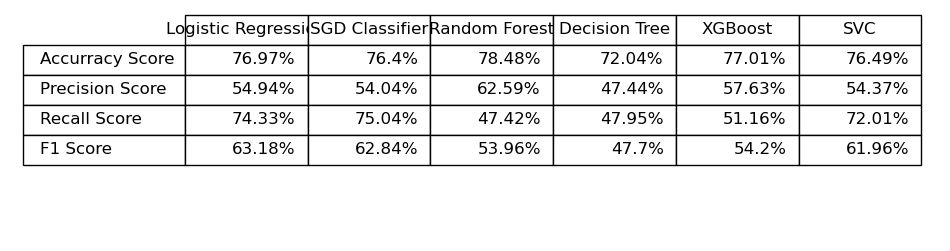

In [215]:
fig, ax = plt.subplots(figsize=(12, 3)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = table(ax, result_table, loc='upper right', colWidths=[0.22]*len(result_table.columns))  # where df is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(0.6, 1.8) # change size table
plt.savefig('table.png', transparent=True)
plt.show()

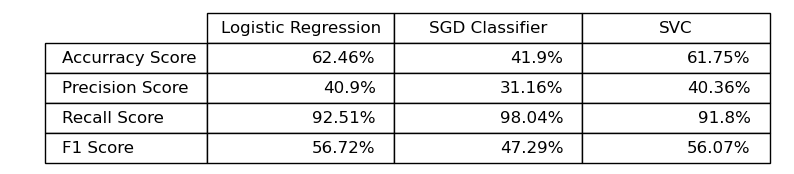

In [231]:
fig, ax = plt.subplots(figsize=(10, 2)) # set size frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis
ax.set_frame_on(False)  # no visible frame, uncomment if size is ok
tabla = table(ax, result_table_hpt, loc='upper right', colWidths=[0.22]*len(result_table_hpt.columns))  # where df is your data frame
tabla.auto_set_font_size(False) # Activate set fontsize manually
tabla.set_fontsize(12) # if ++fontsize is necessary ++colWidths
tabla.scale(1.1, 1.8) # change size table
plt.savefig('table_hpt.png', transparent=True)
plt.show()